<a href="https://colab.research.google.com/github/SurabhiTaneja/Credit-Card-Fraud-Detection/blob/main/Credit_card_fraud_detection_Starter_code%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Exploratory data analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CreditCardFraudDetection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

pd.set_option('display.max_columns', 500)

**Exploratory data analysis**

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking if there are any null values
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df_missing_cols = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('percent-null')).sort_values('percent-null', ascending=False)
df_missing_cols

,percent-null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


There are no missing values. as you can see above. So we can proceed for further EDA

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

If we see above, the class 0 has around 99.8% distribution and class 1 which are the fraud cases has 0.2% distribution.

In [ ]:
#observe the different feature type present in the data



Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
nonfraud=classes[0]/df['Class'].count()*100
fraud=classes[1]/df['Class'].count()*100

In [ ]:
nonfraud

99.82725143693798

In [ ]:
fraud

0.1727485630620034

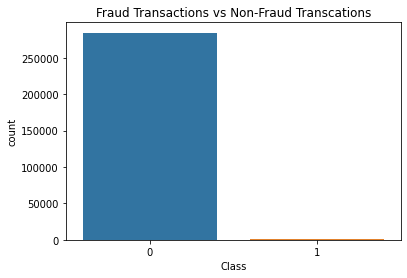

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.countplot(x='Class', data=df)
plt.title('Fraud Transactions vs Non-Fraud Transcations')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


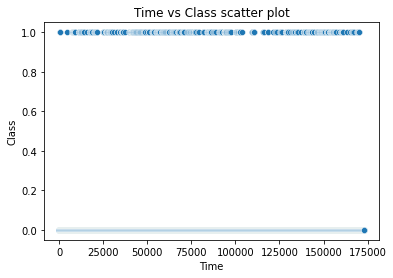

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

There is nothing much observation from time and class distribution, in this case. We can see that class 1 and class 0 both are equally distributed over time.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


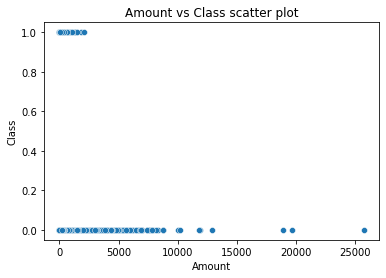

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

We can see that low amount transactions are more susceptible to fraud transactions,while large amount transactions are not fraud.

In [ ]:
# Drop unnecessary columns
# Dropping the time column as nothing much can be observed from time column.
df.drop('Time', axis=1, inplace=True)

In [ ]:
df.shape

(284807, 30)

### Splitting the data into train & test data

In [ ]:
y= df['Class']#target variable 

In [ ]:
X = df.drop(['Class'], axis=1) #feature variables

In [ ]:
from sklearn import model_selection
#Spliting the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [ ]:
# Feature scaling -- Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Scaling the test dataset
# We only transform the test set
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [ ]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


### Plotting the distribution of a variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

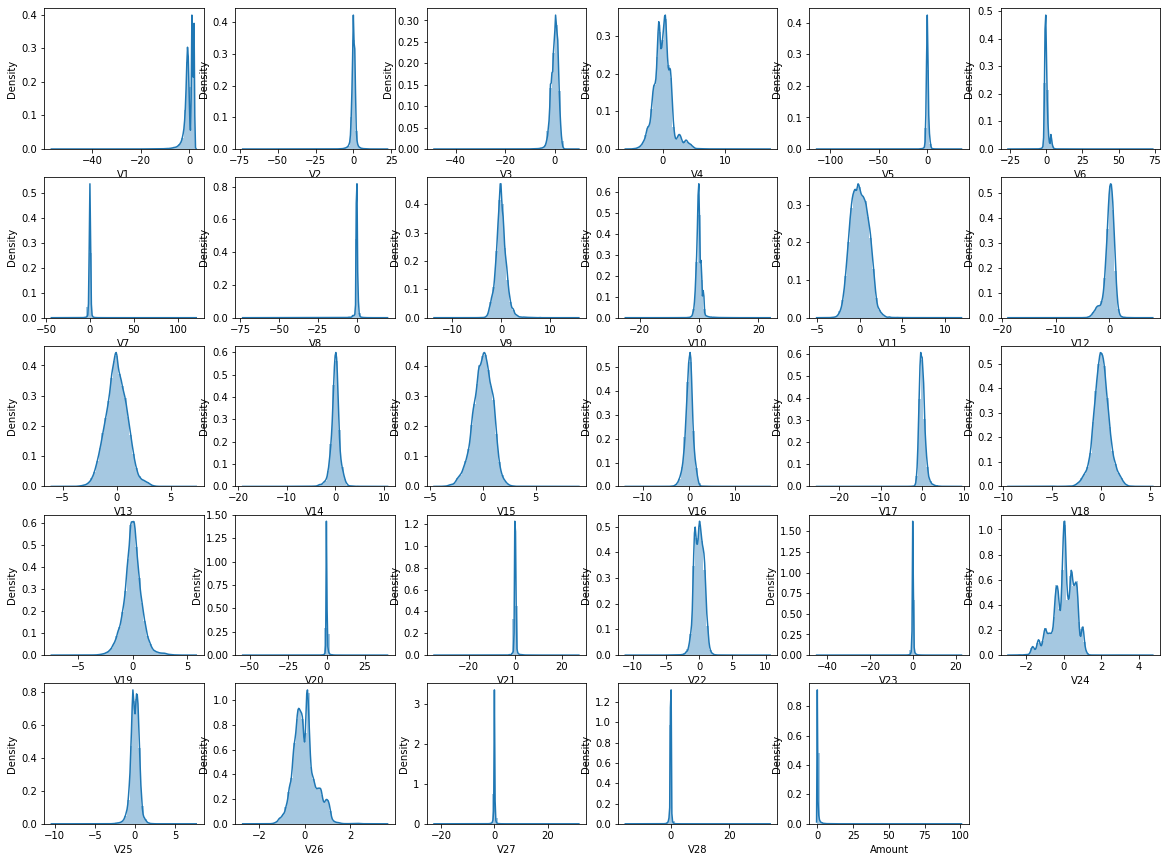

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
col_list = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in col_list:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [ ]:

for i in col_list:
    #col_skew_list.append(X_train[i].skew())
    print(i+" -> "+str(X_train[i].skew()))

V1 -> -3.277668341862227
V2 -> -4.890421228500548
V3 -> -2.2742809278032956
V4 -> 0.6874662430438826
V5 -> -2.8069481898120237
V6 -> 1.944494989697018
V7 -> 3.1805728995257225
V8 -> -8.851620891828
V9 -> 0.5420967657565104
V10 -> 1.1123176299054582
V11 -> 0.3641666126974251
V12 -> -2.3034729032054333
V13 -> 0.061567772469045955
V14 -> -2.014879377485844
V15 -> -0.3126413465119096
V16 -> -1.119030830555113
V17 -> -4.048545929885871
V18 -> -0.26769088418195697
V19 -> 0.11107115048689518
V20 -> -1.8109526782259395
V21 -> 3.0341149260909686
V22 -> -0.19406836585076115
V23 -> -5.9652402653003564
V24 -> -0.5554673743690547
V25 -> -0.42316792385374946
V26 -> 0.579691701974496
V27 -> -0.7731100151665526
V28 -> 11.13447519566459
Amount -> 18.155243079849125


Observation :- There are variables which are heavily skewed as we can see in the above distribution plots. So now we need to transform them to normal distribution 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
#Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:

powerTransformer = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
X_train[col_list] = powerTransformer.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [ ]:

# Transforming the test set
X_test[col_list] = powerTransformer.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

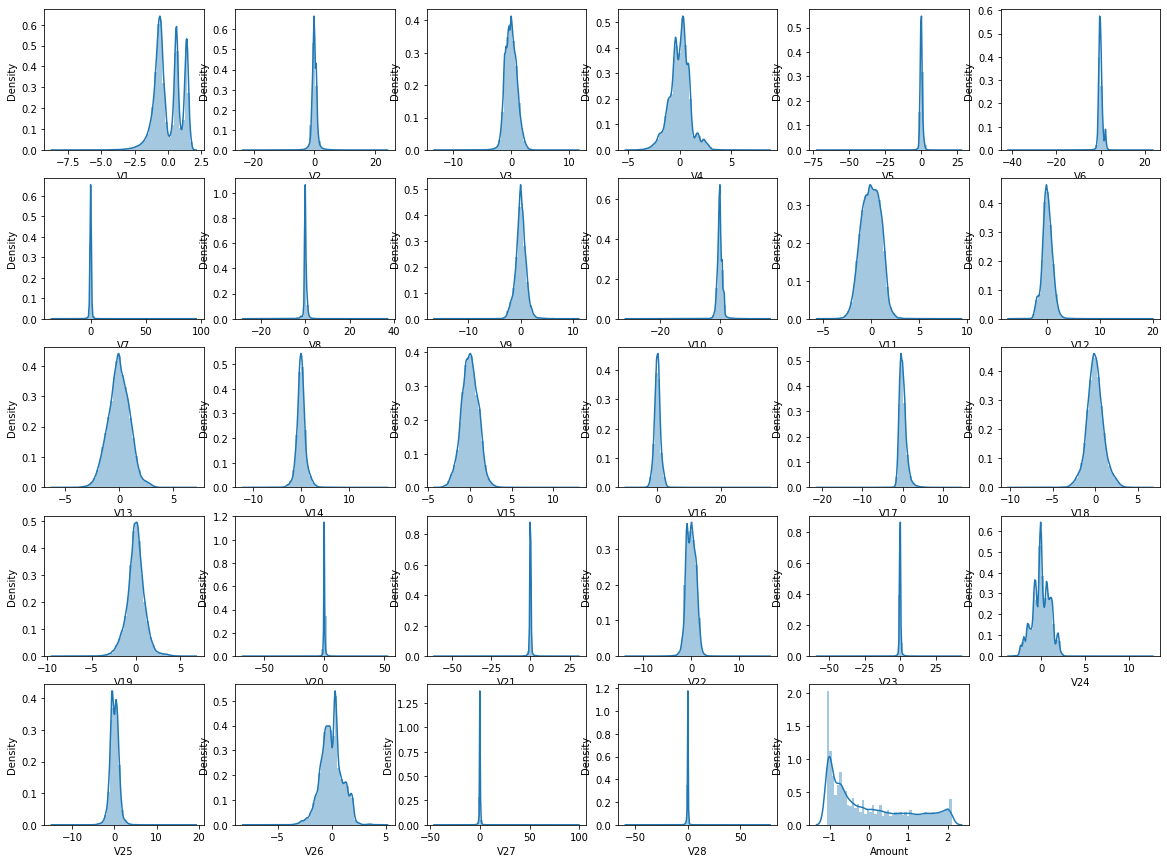

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 

plt.figure(figsize=(20,15))
i=0
for col in col_list:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [ ]:
# col_skew_list = []
for i in col_list:
    #col_skew_list.append(X_train[i].skew())
    print(i+" -> "+str(X_train[i].skew()))

V1 -> -0.21807803967258985
V2 -> 0.34122328304377597
V3 -> -0.08105391046928259
V4 -> 0.019541273737025508
V5 -> -1.3009842694717078
V6 -> -2.027134330512557
V7 -> 2.8704134886150077
V8 -> 2.24274919389289
V9 -> -0.05197644608161713
V10 -> -1.2854712607777012
V11 -> 0.0623948317246068
V12 -> 0.1609140068751561
V13 -> 0.006460443751659671
V14 -> 0.10764674689511888
V15 -> 0.013332918281801909
V16 -> 0.1651575771431743
V17 -> -0.7680390994031316
V18 -> -0.061821133207702036
V19 -> 0.014897050323298609
V20 -> -1.0470875875284444
V21 -> -1.8905674470794993
V22 -> -0.02239408326963744
V23 -> -0.3084855780466432
V24 -> 0.11364645564819159
V25 -> 0.08336575110519731
V26 -> -0.024907168941420126
V27 -> 3.5333553236426383
V28 -> 1.48420946160439
Amount -> 0.7093797284325559


## Model Building
- Build different models on the imbalanced dataset and see the result

## **Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
# setting the KFold value to 5
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specifying params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
#perform cross validation
model = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# #perform hyperparameter tuning
model.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   46.0s finished


Best ROC AUC score:  0.9837192853831933
Best hyperparameters:  {'C': 0.01}


In [ ]:

# results of grid search CV
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.009503,0.030112,0.029003,0.000301,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,0.993743,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,1.347425,0.048362,0.030100,0.001889,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,0.992284,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,1.443657,0.112540,0.029088,0.000458,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,0.991548,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,1.514919,0.112739,0.029174,0.000329,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,0.991467,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,1.500967,0.119686,0.028852,0.000255,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,0.991461,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,1.477380,0.122295,0.029365,0.001187,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,0.991461,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


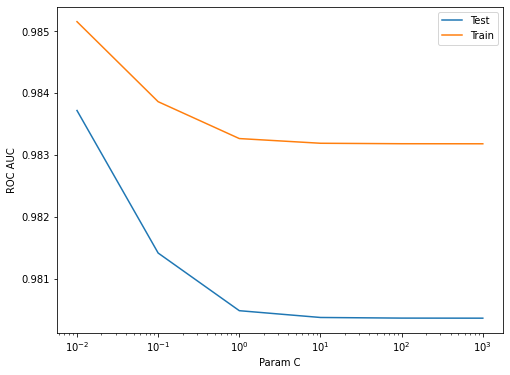

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('Param C')
plt.ylabel('ROC AUC')
plt.legend(['Test', 'Train'], loc='upper right')
plt.xscale('log')

Building the model and Performing Logistic Regression with optimal C

In [ ]:
logistic_reg_model = LogisticRegression(C=0.01)

In [ ]:
# Creating the model
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# model prdictions on train set
y_train_pred = logistic_reg_model.predict(X_train)

In [ ]:
# Printing all the metrics
def printAllMetrics(y_actual, y_pred):
  print("Printing all the metrics :::")
  confusion_metrics = metrics.confusion_matrix(y_actual, y_pred)
  print("Confusion metrics : ")
  print(confusion_metrics)
  TP = confusion_metrics[1,1] # true positive 
  TN = confusion_metrics[0,0] # true negatives
  FP = confusion_metrics[0,1] # false positives
  FN = confusion_metrics[1,0] # false negatives
  print("Accuracy : ",metrics.accuracy_score(y_actual, y_pred))
  print("Sensitivity : -",TP / float(TP+FN))
  print("Specificity : -", TN / float(TN+FP))
  print("F1 Score :", f1_score(y_actual, y_pred))

In [ ]:
#printing all the metrics for training dataset
printAllMetrics(y_train,y_train_pred);

Printing all the metrics :::
Confusion metrics : 
[[227427     22]
 [   135    261]]
Accuracy :  0.9993109350655051
Sensitivity : - 0.6590909090909091
Specificity : - 0.9999032750198946
F1 Score : 0.7687776141384388


In [ ]:
def plot_roc_auc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="upper right")
    plt.show()

    return None

In [ ]:
# Predicting the probability of the training set
y_train_prob = logistic_reg_model.predict_proba(X_train)[:,1]

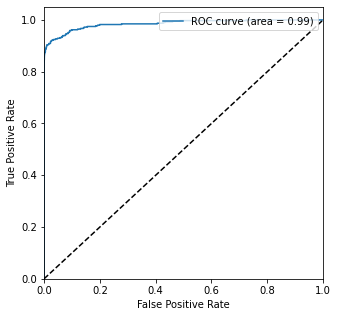

In [ ]:
# plotting the ROC AUC curve
plot_roc_auc_curve(y_train, y_train_prob)

the ROC curve we got is of area 0.99 on the training set. lets check on the test set

In [ ]:
# Predicting on the test dataset
y_test_pred = logistic_reg_model.predict(X_test)

In [ ]:
printAllMetrics(y_test,y_test_pred)

Printing all the metrics :::
Confusion metrics : 
[[56850    16]
 [   42    54]]
Accuracy :  0.9989817773252344
Sensitivity :  0.5625
Specificity :  0.9997186367952731
F1 Score : 0.6506024096385543


In [ ]:
#Printing the ROC curve for the test dataset
y_test_prob = logistic_reg_model.predict_proba(X_test)[:,1]

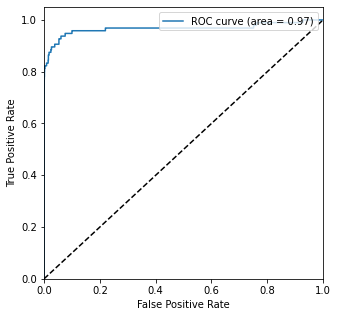

In [ ]:
plot_roc_auc_curve(y_test,y_test_prob)

So we observe that the ROC area is 0.97 for the test set..this means the model is very good.

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# **XGBoost**

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

In [ ]:
# setting the KFold value to 5
folds = 5

# Specifying params
params = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

xgboost = XGBClassifier(max_depth=2, n_estimators=200)
#perform cross validation
model = GridSearchCV(estimator = xgboost,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# #perform hyperparameter tuning
model.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 28.9min finished


Best ROC AUC score:  0.9847847957048635
Best hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.6}


XGBoost model with best params

In [ ]:

# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# Model evaluation on the training set
y_train_pred = xgb_model.predict(X_train)

In [ ]:
printAllMetrics(y_train,y_train_pred)

Printing all the metrics :::
Confusion metrics : 
[[227436     13]
 [    59    337]]
Accuracy :  0.9996839956988304
Sensitivity : - 0.851010101010101
Specificity : - 0.9999428443299377
F1 Score : 0.9034852546916889


In [ ]:
# predicting probabilities
y_train_prob = xgb_model.predict_proba(X_train)[:,1]

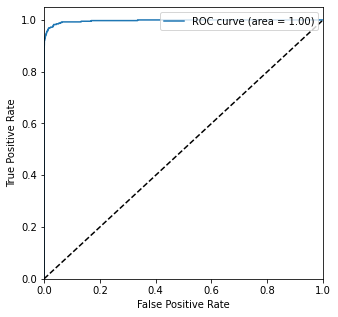

In [ ]:
# Plot ROC curve 
plot_roc_auc_curve(y_train,y_train_prob)

In [ ]:
# Predicting the test dataset
y_test_pred = xgb_model.predict(X_test)

In [ ]:
# printing metrics for test dataset
printAllMetrics(y_test,y_test_pred)

Printing all the metrics :::
Confusion metrics : 
[[56852    14]
 [   23    73]]
Accuracy :  0.9993504441557529
Sensitivity : - 0.7604166666666666
Specificity : - 0.9997538071958639
F1 Score : 0.7978142076502732


In [ ]:
#Prob of the test dataset
y_test_prob = xgb_model.predict_proba(X_test)[:,1]

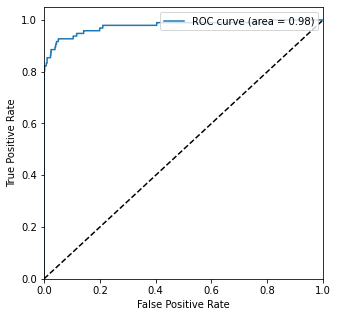

In [ ]:
#roc
plot_roc_auc_curve(y_test,y_test_prob)

Observation : The model is performing very good

# Decision Tree

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# setting the KFold value to 5
folds = 5

# Specifying params
params ={
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
} 

#perform cross validation
model = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# #perform hyperparameter tuning
model.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.4min finished


Best ROC AUC score:  0.944169135506501
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [ ]:

# cv results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.396942,0.042458,0.018135,0.000534,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.951746,0.935278,0.892023,0.923725,0.941589,0.928872,0.020544,8,0.963635,0.948951,0.939804,0.938154,0.950376,0.948184,0.009110
1,5.370555,0.043463,0.018852,0.002414,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.951747,0.935278,0.892034,0.923732,0.941585,0.928875,0.020539,7,0.963635,0.948951,0.939804,0.938154,0.950376,0.948184,0.009110
2,5.442226,0.049024,0.018391,0.000738,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.951529,0.947742,0.903994,0.923517,0.941765,0.933709,0.017699,5,0.963452,0.948714,0.951992,0.937969,0.955424,0.951510,0.008359
3,5.431109,0.067837,0.019253,0.001626,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.951529,0.947742,0.903994,0.923517,0.941765,0.933709,0.017699,5,0.963452,0.948714,0.951992,0.937969,0.955424,0.951510,0.008359
4,10.756658,0.134464,0.020036,0.000746,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.951558,0.943091,0.927203,0.923807,0.934573,0.936046,0.010202,4,0.984692,0.972651,0.973336,0.969453,0.976013,0.975229,0.005172
5,10.633136,0.099026,0.019413,0.000719,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.939237,0.930732,0.927211,0.948832,0.934563,0.936115,0.007512,3,0.984692,0.972651,0.973336,0.969453,0.976012,0.975229,0.005172
6,10.416293,0.060732,0.019650,0.000388,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.950866,0.948068,0.932571,0.937983,0.951358,0.944169,0.007544,1,0.984214,0.986578,0.986383,0.970520,0.982835,0.982106,0.005958
7,10.461884,0.039006,0.019760,0.000343,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.939114,0.948085,0.932577,0.937996,0.951394,0.941833,0.006903,2,0.984471,0.986578,0.986383,0.970520,0.982835,0.982157,0.005977


In [ ]:
print(model.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
#Building model using the optimal hyper parameters
decision_tree_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
# Predictions on the train set
y_train_pred = decision_tree_model.predict(X_train)

In [ ]:
printAllMetrics(y_train,y_train_pred)

Printing all the metrics :::
Confusion metrics : 
[[227374     75]
 [   114    282]]
Accuracy :  0.9991704887094297
Sensitivity : - 0.7121212121212122
Specificity : - 0.9996702557496405
F1 Score : 0.7490039840637449


In [ ]:
# predicting probabilities
y_train_prob = decision_tree_model.predict_proba(X_train)[:,1]

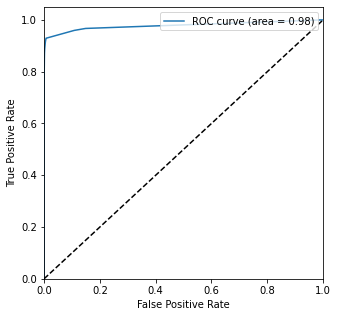

In [ ]:
#roc
plot_roc_auc_curve(y_train,y_train_prob)

In [ ]:
#prediction on test datasets
y_test_pred = decision_tree_model.predict(X_test)

In [ ]:
printAllMetrics(y_test,y_test_pred)

Printing all the metrics :::
Confusion metrics : 
[[56836    30]
 [   40    56]]
Accuracy :  0.9987711105649381
Sensitivity : - 0.5833333333333334
Specificity : - 0.9994724439911371
F1 Score : 0.6153846153846155


In [ ]:
#predicting the prob
y_test_prob = decision_tree_model.predict_proba(X_test)[:,1]

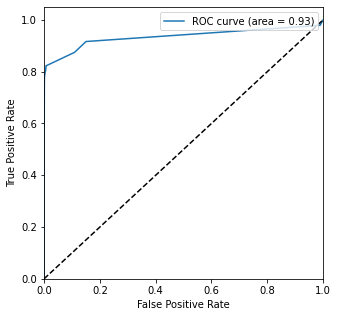

In [ ]:
#roc
plot_roc_auc_curve(y_test,y_test_prob)

# Random Forest

In [ ]:

# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# setting the KFold value to 2
folds = 2

# Specifying params

params = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

#perform cross validation
model = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True) 

# #perform hyperparameter tuning
model.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 116.3min finished


Best ROC AUC score:  0.972856107812292
Best hyperparameters:  {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 300}


In [ ]:

# building the model with the best hyperparameters

random_forest_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=300)

In [ ]:
# Fitting the model of optimum params
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Prediction for the training set
y_train_pred = random_forest_model.predict(X_train)

In [ ]:
printAllMetrics(y_train,y_train_pred)

Printing all the metrics :::
Confusion metrics : 
[[227413     36]
 [   118    278]]
Accuracy :  0.9993241019113871
Sensitivity : - 0.702020202020202
Specificity : - 0.9998417227598275
F1 Score : 0.7830985915492958


In [ ]:
y_train_prob = random_forest_model.predict_proba(X_train)[:,1]

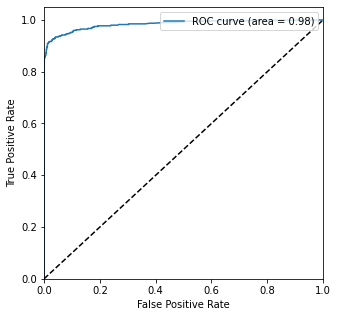

In [ ]:
plot_roc_auc_curve(y_train,y_train_prob)

In [ ]:
#Doing the predictions on test dataset
y_test_pred = random_forest_model.predict(X_test)

In [ ]:
printAllMetrics(y_test,y_test_pred)

Printing all the metrics :::
Confusion metrics : 
[[56846    20]
 [   41    55]]
Accuracy :  0.9989291106351603
Sensitivity : - 0.5729166666666666
Specificity : - 0.9996482959940913
F1 Score : 0.6432748538011696


In [ ]:
y_test_prob = random_forest_model.predict_proba(X_test)[:,1]

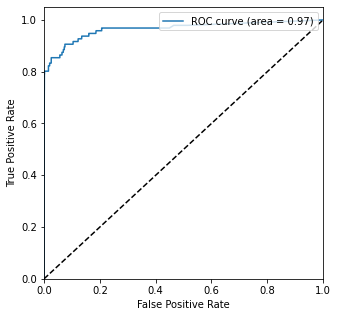

In [ ]:
plot_roc_auc_curve(y_test,y_test_prob)

So we have models with roc-auc value 
Logistic regression - 0.97
XGboost - 0.98
Decision tree - 0.93
Random Forest - 0.97

From this observations , XGBoost model has performed better than the other models. So will prefer this model

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}


clf =   XGBClassifier(params = params)#initialise the model with optimum hyperparameters
# fit model on training data
clf.fit(X_train, y_train)
y_test_prob = clf.predict_proba(X_test)[:,1]
print('XGBoost ROC AUC score on test dataset: ', metrics.roc_auc_score(y_test, y_test_prob)) #print the evaluation score on the X_test by choosing the best evaluation metric

XGBoost ROC AUC score on test dataset:  0.9762384560487227


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


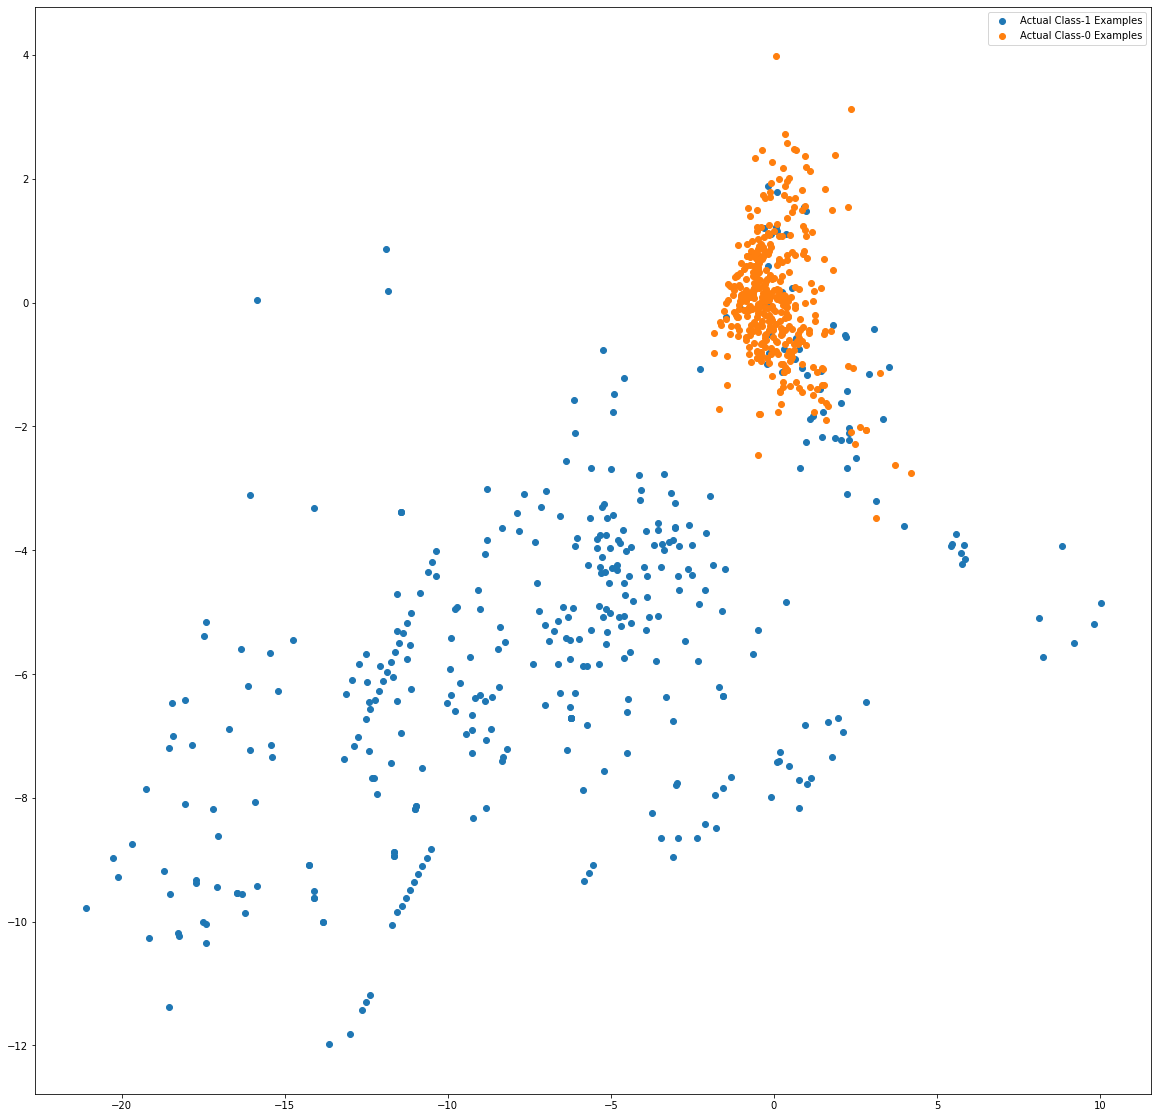

In [ ]:
 # Printing the important features of the XGBoost
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [ ]:
# Importing the library
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# initializing the random oversampler object
randomOversampler = RandomOverSampler()

In [ ]:
# Resampling using the OverSampling technique
X_train_over , y_train_over = randomOversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_over.shape, y_train_over.shape

((454898, 29), (454898,))

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

Logistic Regression after Random Oversampling

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package


In [ ]:
# setting the KFold value to 5
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specifying params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
#perform cross validation
model = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# #perform hyperparameter tuning
model.fit(X_train_over, y_train_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.5min finished


Best ROC AUC score:  0.9885482896128612
Best hyperparameters:  {'C': 1}


In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.506821,0.109479,0.054216,0.000920,0.01,{'C': 0.01},0.988538,0.988753,0.988280,0.988898,0.988211,0.988536,0.000264,6,0.988541,0.988489,0.988563,0.988599,0.988578,0.988554,0.000037
1,2.698918,0.089960,0.055735,0.003634,0.1,{'C': 0.1},0.988535,0.988782,0.988292,0.988902,0.988228,0.988548,0.000264,5,0.988553,0.988504,0.988570,0.988612,0.988586,0.988565,0.000036
2,2.687519,0.145618,0.053921,0.000833,1,{'C': 1},0.988535,0.988783,0.988295,0.988899,0.988229,0.988548,0.000262,1,0.988554,0.988504,0.988571,0.988612,0.988586,0.988565,0.000036
3,2.720313,0.173730,0.056406,0.005214,10,{'C': 10},0.988535,0.988783,0.988294,0.988899,0.988229,0.988548,0.000263,3,0.988554,0.988504,0.988571,0.988612,0.988586,0.988565,0.000036
4,2.732082,0.145125,0.054635,0.000777,100,{'C': 100},0.988535,0.988784,0.988294,0.988899,0.988229,0.988548,0.000263,2,0.988554,0.988504,0.988571,0.988612,0.988586,0.988565,0.000036
5,2.727695,0.167709,0.054617,0.000843,1000,{'C': 1000},0.988535,0.988784,0.988294,0.988899,0.988229,0.988548,0.000263,4,0.988555,0.988504,0.988571,0.988612,0.988586,0.988565,0.000036


In [ ]:
# Building the model using the optimal C value
logistic_reg_over = LogisticRegression(C=1)

logistic_reg_over_model = logistic_reg_over.fit(X_train_over, y_train_over)

In [ ]:
# Prediction the training values 
y_train_over_pred = logistic_reg_over_model.predict(X_train_over)

In [ ]:
#Printing the metrics
printAllMetrics(y_train_over,y_train_over_pred)

Printing all the metrics :::
Confusion metrics : 
[[222281   5168]
 [ 17665 209784]]
Accuracy :  0.9498063302102889
Sensitivity : - 0.9223342375653443
Specificity : - 0.9772784228552335
F1 Score : 0.9483884530098259


In [ ]:
# predicting the probabilities of training dataset
y_train_over_prob = logistic_reg_over_model.predict_proba(X_train_over)[:,1]

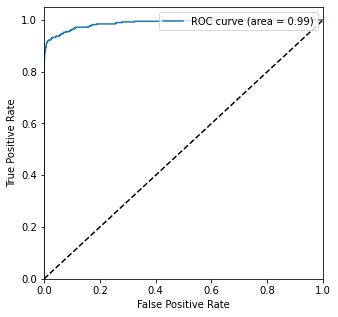

In [ ]:
#Plottig the ROC-AUC curve
plot_roc_auc_curve(y_train_over,y_train_over_prob)

In [ ]:
# We got a good score on training set lets predict for the test set


In [ ]:
y_test_pred = logistic_reg_over_model.predict(X_test)

In [ ]:
printAllMetrics(y_test,y_test_pred)

Printing all the metrics :::
Confusion metrics : 
[[55540  1326]
 [   11    85]]
Accuracy :  0.9765282117903163
Sensitivity : - 0.8854166666666666
Specificity : - 0.976682024408258
F1 Score : 0.11280690112806901


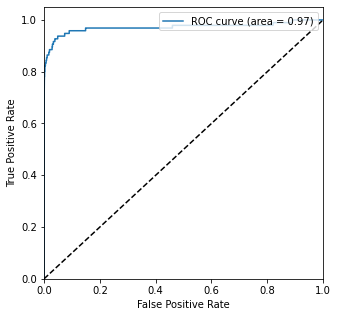

In [ ]:
#printing ROC _AUC curve for test set
y_test_prob = logistic_reg_over_model.predict_proba(X_test)[:,1]

plot_roc_auc_curve(y_test,y_test_prob)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

XGBoost Using Random OverSampling

In [ ]:
# setting the KFold value to 5
folds = 5

# Specifying params
params = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

xgboost = XGBClassifier(max_depth=2, n_estimators=200)
#perform cross validation
model = GridSearchCV(estimator = xgboost,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# #perform hyperparameter tuning
model.fit(X_train_over, y_train_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 49.2min finished


Best ROC AUC score:  0.9999917920024745
Best hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.6}


In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,88.306798,1.570144,0.521217,0.003037,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999910,0.999899,0.999951,0.999948,0.999890,0.999920,0.000025,4,0.999928,0.999934,0.999933,0.999925,0.999932,0.999930,3.375552e-06
1,103.300516,1.069318,0.522124,0.006599,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999921,0.999887,0.999945,0.999948,0.999873,0.999915,0.000030,6,0.999932,0.999930,0.999926,0.999922,0.999922,0.999926,4.100591e-06
2,100.023382,1.663484,0.520546,0.003593,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999919,0.999874,0.999953,0.999948,0.999892,0.999917,0.000031,5,0.999930,0.999918,0.999931,0.999919,0.999933,0.999926,6.349510e-06
3,83.382449,0.223019,0.528381,0.006161,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999986,0.999978,0.999980,0.999998,0.999971,0.999983,0.000009,3,0.999996,0.999995,0.999994,0.999996,0.999997,0.999996,8.474127e-07
4,99.665071,1.186014,0.526648,0.002107,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999998,0.999992,0.999995,0.999994,0.999980,0.999992,0.000006,1,0.999999,0.999999,0.999997,0.999999,1.000000,0.999999,1.133470e-06
5,99.568019,0.676280,0.526734,0.003291,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",1.000000,0.999991,0.999998,0.999995,0.999956,0.999988,0.000016,2,1.000000,1.000000,0.999995,0.999999,0.999999,0.999998,1.745657e-06


In [ ]:
 #Building a model using the optimal hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
#Predicting the training set
y_train_over_pred = xgb_over_model.predict(X_train_over)

# printing the metrics
printAllMetrics(y_train_over, y_train_over_pred)

Printing all the metrics :::
Confusion metrics : 
[[226492    957]
 [     0 227449]]
Accuracy :  0.9978962316827069
Sensitivity : - 1.0
Specificity : - 0.9957924633654138
F1 Score : 0.9979006482324423


In [ ]:
#Predicting the probabilitites of training dataset
y_train_over_prob = xgb_over_model.predict_proba(X_train_over)[:,1]

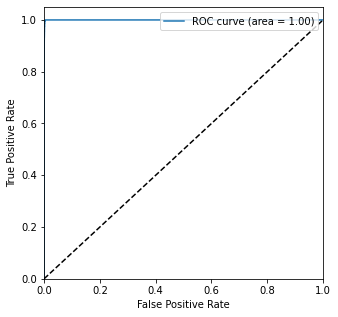

In [ ]:
#plotting the roc-auc curve
plot_roc_auc_curve(y_train_over, y_train_over_prob)

In [ ]:
X_train_over.shape

(454898, 29)

In [ ]:
#prediction on the test dataset
y_test_pred = xgb_over_model.predict(X_test.values)

In [ ]:
#printing the metrics
printAllMetrics(y_test, y_test_pred)

Printing all the metrics :::
Confusion metrics : 
[[56595   271]
 [   18    78]]
Accuracy :  0.9949264421895299
Sensitivity : - 0.8125
Specificity : - 0.9952344107199381
F1 Score : 0.350561797752809


In [ ]:
#predicting the probabilities on test dataset
y_test_prob = xgb_over_model.predict_proba(X_test.values)[:,1]

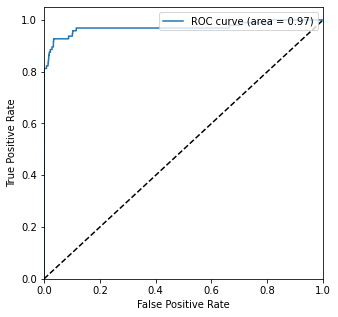

In [ ]:
#roc - auc curve
plot_roc_auc_curve(y_test,y_test_prob)

Decision Tree

In [ ]:
# setting the KFold value to 5
folds = 5

# Specifying params
params ={
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
} 

#perform cross validation
model = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# #perform hyperparameter tuning
model.fit(X_train_over, y_train_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.7min finished


Best ROC AUC score:  0.9996657980017174
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [131]:
# Model with optimal hyperparameters
decision_tree_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

decision_tree_over_model.fit(X_train_over, y_train_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [132]:
#Predictions on Train dataset
y_train_over_pred = decision_tree_over_model.predict(X_train_over)

In [133]:
printAllMetrics(y_train_over, y_train_over_pred)

Printing all the metrics :::
Confusion metrics : 
[[225799   1650]
 [     0 227449]]
Accuracy :  0.9963728132460463
Sensitivity : - 1.0
Specificity : - 0.9927456264920927
F1 Score : 0.9963859221812383


In [134]:
#Predicting the probabilities
y_train_over_prob = decision_tree_over_model.predict_proba(X_train_over)[:,1]

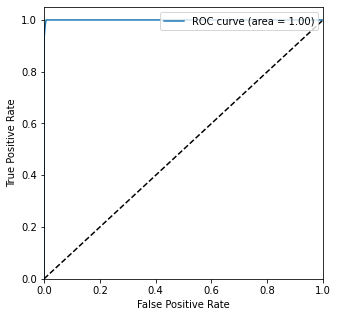

In [135]:
plot_roc_auc_curve(y_train_over,y_train_over_prob)

In [136]:
#prediction on test dataset
y_test_pred = decision_tree_over_model.predict(X_test)

In [137]:
printAllMetrics(y_test,y_test_pred)

Printing all the metrics :::
Confusion metrics : 
[[56412   454]
 [   21    75]]
Accuracy :  0.9916611074049366
Sensitivity : - 0.78125
Specificity : - 0.9920163190658742
F1 Score : 0.24


In [138]:
y_test_prob = decision_tree_over_model.predict_proba(X_test)[:,1]

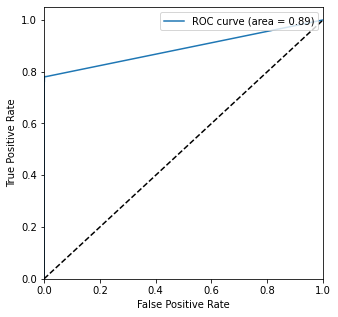

In [139]:
plot_roc_auc_curve(y_test, y_test_prob)

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)